###Import Libraries

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

###Upload the Netflix Dataset

In [72]:
from google.colab import files
uploadeddataset = files.upload()

Saving Netflix Dataset.xlsx to Netflix Dataset (4).xlsx


In [73]:
df=pd.read_excel('Netflix Dataset.xlsx')

###Overview of the Dataset

In [74]:
print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (7789, 11)
  Show_Id Category     Title           Director  \
0      s1  TV Show      0.03                NaN   
1      s2    Movie  07:19:00  Jorge Michel Grau   
2      s3    Movie  23:59:00       Gilbert Chan   
3      s4    Movie         9        Shane Acker   
4      s5    Movie        21     Robert Luketic   

                                                Cast        Country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          Release_Date Rating   Duration  \
0  2020-08-14 00:00:00  TV-MA  4 Seasons   
1  2016-12-23 00:00:00  TV-MA     93 min   
2  2018-12-20 00:00:00      R     78 min   
3  2017-11-16 00:00:00  PG-13     80 min   
4  2020-01-01 00:00:

In [75]:
print("\nColumn Information:\n")
print(df.info())


Column Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB
None


###Missing Values in the Dataset

In [76]:
print("\nMissing Values per column:\n")
print(df.isnull().sum())


Missing Values per column:

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64


###Summary Statistics

In [77]:
print("\nSummary Statistics for Numerical Columns:\n")
print(df.describe())


Summary Statistics for Numerical Columns:

       Show_Id Category              Title                Director  \
count     7789     7789               7789                    5401   
unique    7787        2               7787                    4050   
top      s6621    Movie  The Lost Okoroshi  Raúl Campos, Jan Suter   
freq         2     5379                  2                      18   

                      Cast        Country         Release_Date Rating  \
count                 7071           7282                 7779   7782   
unique                6831            681                 1565     14   
top     David Attenborough  United States  2020-01-01 00:00:00  TV-MA   
freq                    18           2556                  118   2865   

        Duration           Type  \
count       7789           7789   
unique       216            492   
top     1 Season  Documentaries   
freq        1608            334   

                                              Description  
cou

###Unique Values in each column

In [78]:
print("\nUnique Value Counts:\n")
for col in df.columns:
    print(f"{col} : {df[col].nunique()} unique values")


Unique Value Counts:

Show_Id : 7787 unique values
Category : 2 unique values
Title : 7787 unique values
Director : 4050 unique values
Cast : 6831 unique values
Country : 681 unique values
Release_Date : 1565 unique values
Rating : 14 unique values
Duration : 216 unique values
Type : 492 unique values
Description : 7769 unique values


In [79]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['Year'] = df['Release_Date'].dt.year

###1. Distribution of Movies vs TV Shows over the years

<Figure size 1000x500 with 0 Axes>

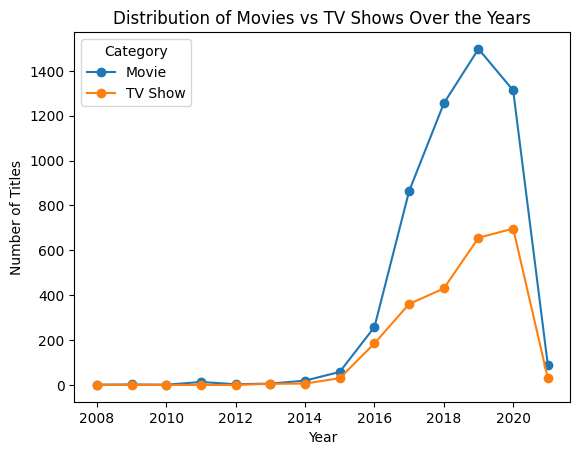

In [80]:
trend = df.groupby(['Year', 'Category']).size().unstack().fillna(0)

plt.figure(figsize=(10,5))
trend.plot(kind="line", marker="o")
plt.title("Distribution of Movies vs TV Shows Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.legend(title="Category")
plt.show()

This Plot compares the Number of Movies and TV shows released each year from 2008 to 2021. Movie releases sharply increased from 2016 to 2019, peaking in 2019, then declined steeply after 2020, while TV shows grew steadily and peaked later, but with fewer titles than movies. Overall, both categories saw significant growth after 2015 before dropping sharply in 2021.

###2. Most Common Genres (Top 10 overall)

/tmp/ipython-input-3471882303.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




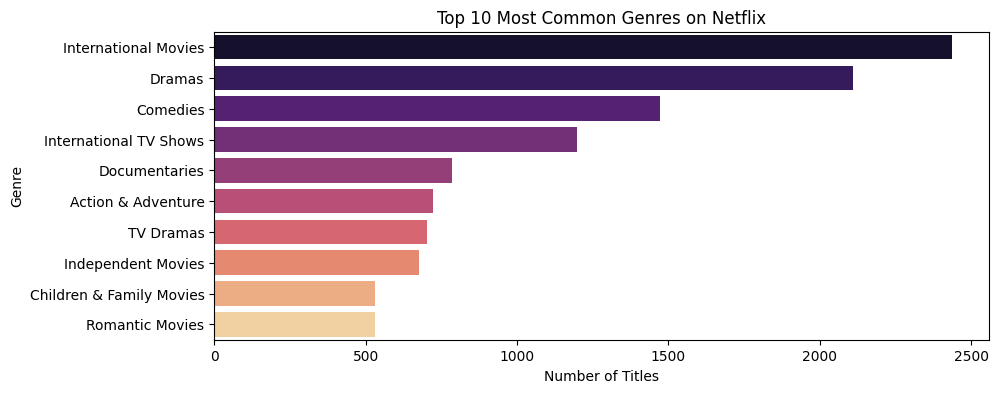

In [85]:
all_genres = []
for genre in df['Type'].dropna():
    all_genres.extend([g.strip() for g in genre.split(',')])

genre_counts = Counter(all_genres).most_common(10)
genres_df = pd.DataFrame(genre_counts, columns=['Genre', 'Count'])

plt.figure(figsize=(10,4))
sns.barplot(x="Count", y="Genre", data=genres_df, palette="magma")
plt.title("Top 10 Most Common Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()

Visualizes the ranking of Top 10 genres on Netflix by number of titles. "International Movies" is the most common genre, followed by "Dramas" and "Comedies", while genres like "Romantic Movies" and "Children & Family Movies" are less frequent.

###2b. Popularity of Genres Over Time

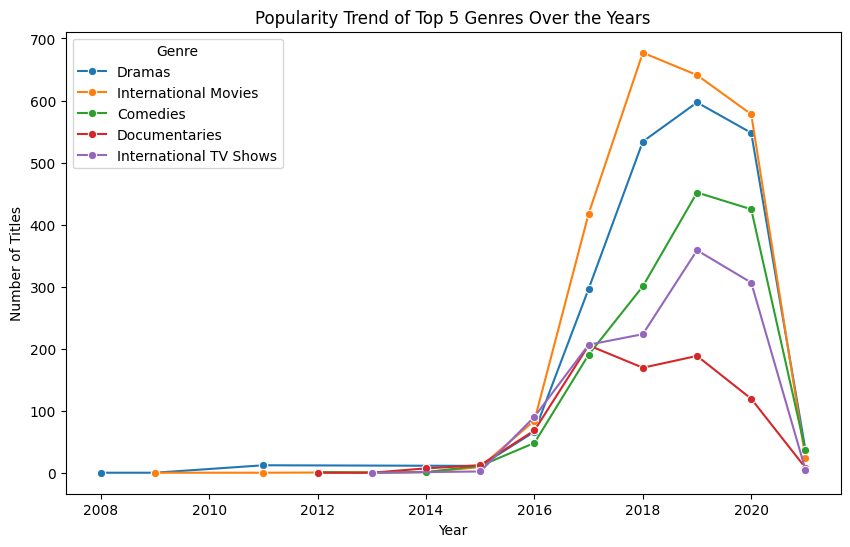

In [84]:
genre_expanded = df[['Title', 'Year', 'Type']].dropna()
genre_expanded['Type'] = genre_expanded['Type'].str.split(',')
genre_expanded = genre_expanded.explode('Type')
genre_expanded['Type'] = genre_expanded['Type'].str.strip()

genre_trend = genre_expanded.groupby(['Year','Type']).size().reset_index(name="Count")

top5_genres = genres_df['Genre'].head(5).tolist()
genre_trend_top5 = genre_trend[genre_trend['Type'].isin(top5_genres)]

plt.figure(figsize=(10,6))
sns.lineplot(data=genre_trend_top5, x="Year", y="Count", hue="Type", marker="o")
plt.title("Popularity Trend of Top 5 Genres Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.legend(title="Genre")
plt.show()

Visualizes the popularity of Top 5 Netflix genres from 2008 to 2021. "International Movies" and "Dramas" grew rapidly from 2016, peaking around 2018-2019, followed by a decline after 2020. Other genres like "Comedies," "Documentaries," and "International TV Shows" show similar trends but with fewer titles and lower peaks.

###3. Country-wise Contribution (Top 10)

In [86]:
import plotly.express as px
all_countries = []
for country in df['Country'].dropna():
    all_countries.extend([c.strip() for c in country.split(',')])
country_counts = Counter(all_countries).most_common(10)
countries_df = pd.DataFrame(country_counts, columns=['Country', 'Count'])
fig = px.bar(
    countries_df,
    x="Count",
    y="Country",
    orientation="h",
    color="Count",
    color_continuous_scale="teal",
    title="Top 10 Countries Contributing to Netflix Catalog",
    labels={"Count": "Number of Titles", "Country": "Country"}
)
fig.update_layout(yaxis=dict(autorange="reversed"))
fig.show()

Plot displays the top 10 countries by the Number of Titles. United States dominating with well over 3,000 titles, followed by a significant drop-off to India with just under 1,000 titles, and the United Kingdom in third. The remaining seven countries—Canada, France, Japan, Spain, South Korea, Germany, and Mexico—each contribute fewer than 500 titles, indicating that the US holds a massive majority of the content volume.